# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

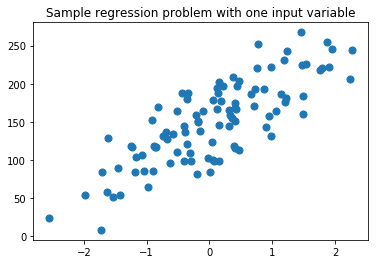

In [2]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

In [4]:
lin = LinearRegression().fit(X_train, y_train)

In [5]:
print('Coff(w): {}'.format(lin.coef_))
print('Intercept(b): {}'.format(lin.intercept_))

Coff(w): [ 45.70870465]
Intercept(b): 148.44575345658873


In [6]:
lin.score(X_test, y_test)

0.49159615934930306

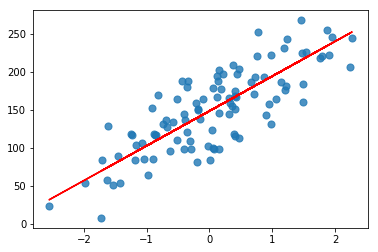

In [7]:
plt.figure()
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, lin.coef_*X_R1+lin.intercept_, 'r-')
plt.show()

# Ridge regression

In [8]:
crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.ix[:,columns_to_keep].dropna()

X_crime = crime.ix[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']


D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
D:\ML_Workshop\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

In [10]:
from sklearn.linear_model import Ridge

In [11]:
md = Ridge().fit(X_train, y_train)

In [12]:
md.score(X_test, y_test)

0.49696128522769895

In [13]:
# to increase the accuracy of the model we need to scale the inputs

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
newMD = Ridge(alpha=20) 

In [18]:
newMD.fit(X_train_scaled, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
newMD.score(X_test_scaled, y_test)

0.59860660199992943

In [20]:
X_train_scaled

array([[ 0.00319792,  0.30927835,  0.18411943, ...,  0.76682152,
         0.932838  ,  0.94513195],
       [ 0.00166226,  0.62542955,  0.28061445, ...,  0.50022479,
         0.74927156,  0.85254212],
       [ 0.0158184 ,  0.34020619,  0.1797923 , ...,  0.65397872,
         0.73659674,  0.81854779],
       ..., 
       [ 0.00273322,  0.39862543,  0.19753354, ...,  0.71122434,
         0.87223193,  0.92053079],
       [ 0.00142517,  0.34364261,  0.19428819, ...,  0.56076727,
         0.71824009,  0.83092292],
       [ 0.00247167,  0.36082474,  0.27823453, ...,  0.68035366,
         0.82444639,  0.92187267]])

# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

In [22]:
scale = MinMaxScaler()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
md = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

In [26]:
md.score(X_test_scaled, y_test)

0.62377258570154015

# Logistic Regression

In [27]:
import os
import sys
sys.path.insert(0, os.path.abspath(r'D:\Coursera Data Science\Course 3'))

In [28]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [29]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


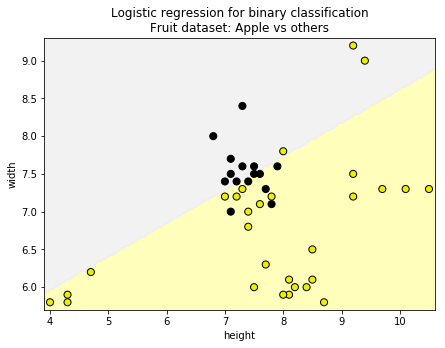

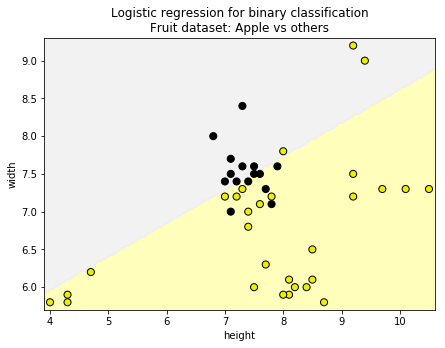

In [30]:
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5));
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes);
subaxes.set_xlabel('height');
subaxes.set_ylabel('width');
plt.show();

# SVM

In [31]:
from sklearn.datasets import make_classification

In [32]:
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

In [33]:
X_C2

array([[ 0.37163989, -0.92276158],
       [-0.1617182 ,  0.51386743],
       [-1.63650855,  2.23389996],
       [ 0.62041909, -2.18941375],
       [-0.98718544,  1.93299453],
       [-0.14918509,  1.30535614],
       [ 1.61878776,  0.31495229],
       [-2.0077599 ,  1.98857017],
       [ 0.51055071, -0.12656384],
       [ 0.41002859, -0.70119016],
       [ 0.52751248,  1.0967429 ],
       [ 0.59985786,  1.28037474],
       [ 0.45312252,  0.85489986],
       [-1.00514147,  0.77186707],
       [ 0.47834537,  1.85361297],
       [ 0.29625824, -0.78978825],
       [ 0.32783482, -0.5227981 ],
       [ 0.60447379, -0.14882659],
       [ 0.50205696,  1.12159087],
       [ 0.60563412,  0.42995032],
       [-1.28273822,  1.02817583],
       [ 0.30764063,  0.93661465],
       [ 0.38097545,  1.45206938],
       [ 0.35846584, -0.9653136 ],
       [ 0.3016695 ,  0.35707675],
       [ 0.64998136, -0.17995055],
       [-0.15122279,  0.47865617],
       [ 0.45000368,  1.33240861],
       [ 0.2858526 ,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,random_state=0 )

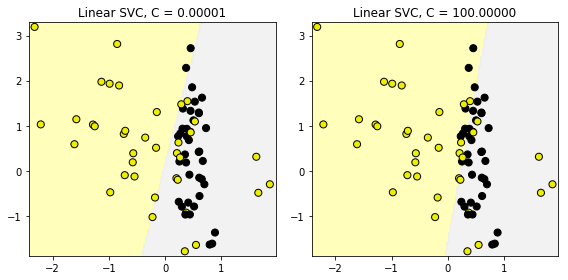

In [35]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()
plt.show();

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state=0 )
md = LinearSVC().fit(X_train, y_train)

In [38]:
md.score(X_test, y_test)

0.93706293706293708

# Kernelized SVM

In [40]:
from sklearn.datasets import make_blobs

In [41]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

In [43]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

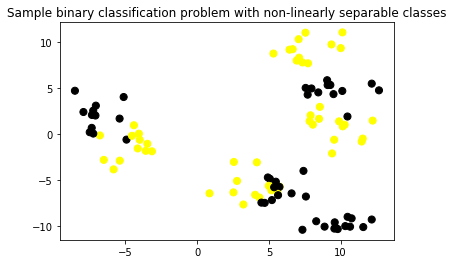

In [45]:
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show();


In [46]:
from sklearn.svm import SVC

In [47]:
from adspy_shared_utilities import plot_class_regions_for_classifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

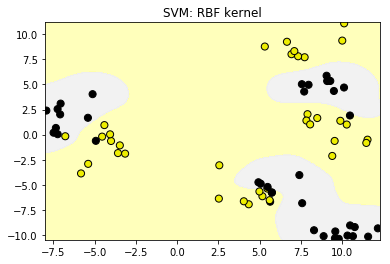

In [49]:
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,'SVM: RBF kernel')

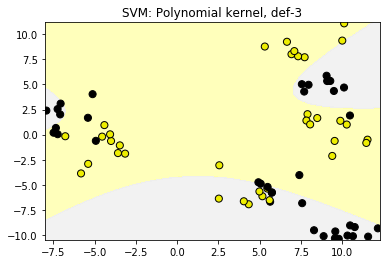

In [50]:
plot_class_regions_for_classifier(SVC(kernel='poly', degree=3).fit(X_train, y_train),
                                 X_train, y_train, None, None,'SVM: Polynomial kernel, def-3')

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y, cv=10)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.85714286  0.71428571  0.85714286  0.71428571  0.85714286  0.66666667
  0.8         0.8         1.          0.33333333]
Mean cross-validation score (3-fold): 0.760


D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\ML_Workshop\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
